In [ ]:
import json 
with open('bp_uncertainty_results/plots/data/plot_data.json', 'r') as f:
    bp_data = json.load(f)

with open('mf_uncertainty_results/plots/data/plot_data.json', 'r') as f:
    mf_data = json.load(f)

with open('cc_uncertainty_results/plots/data/plot_data.json', 'r') as f:
    cc_data = json.load(f)



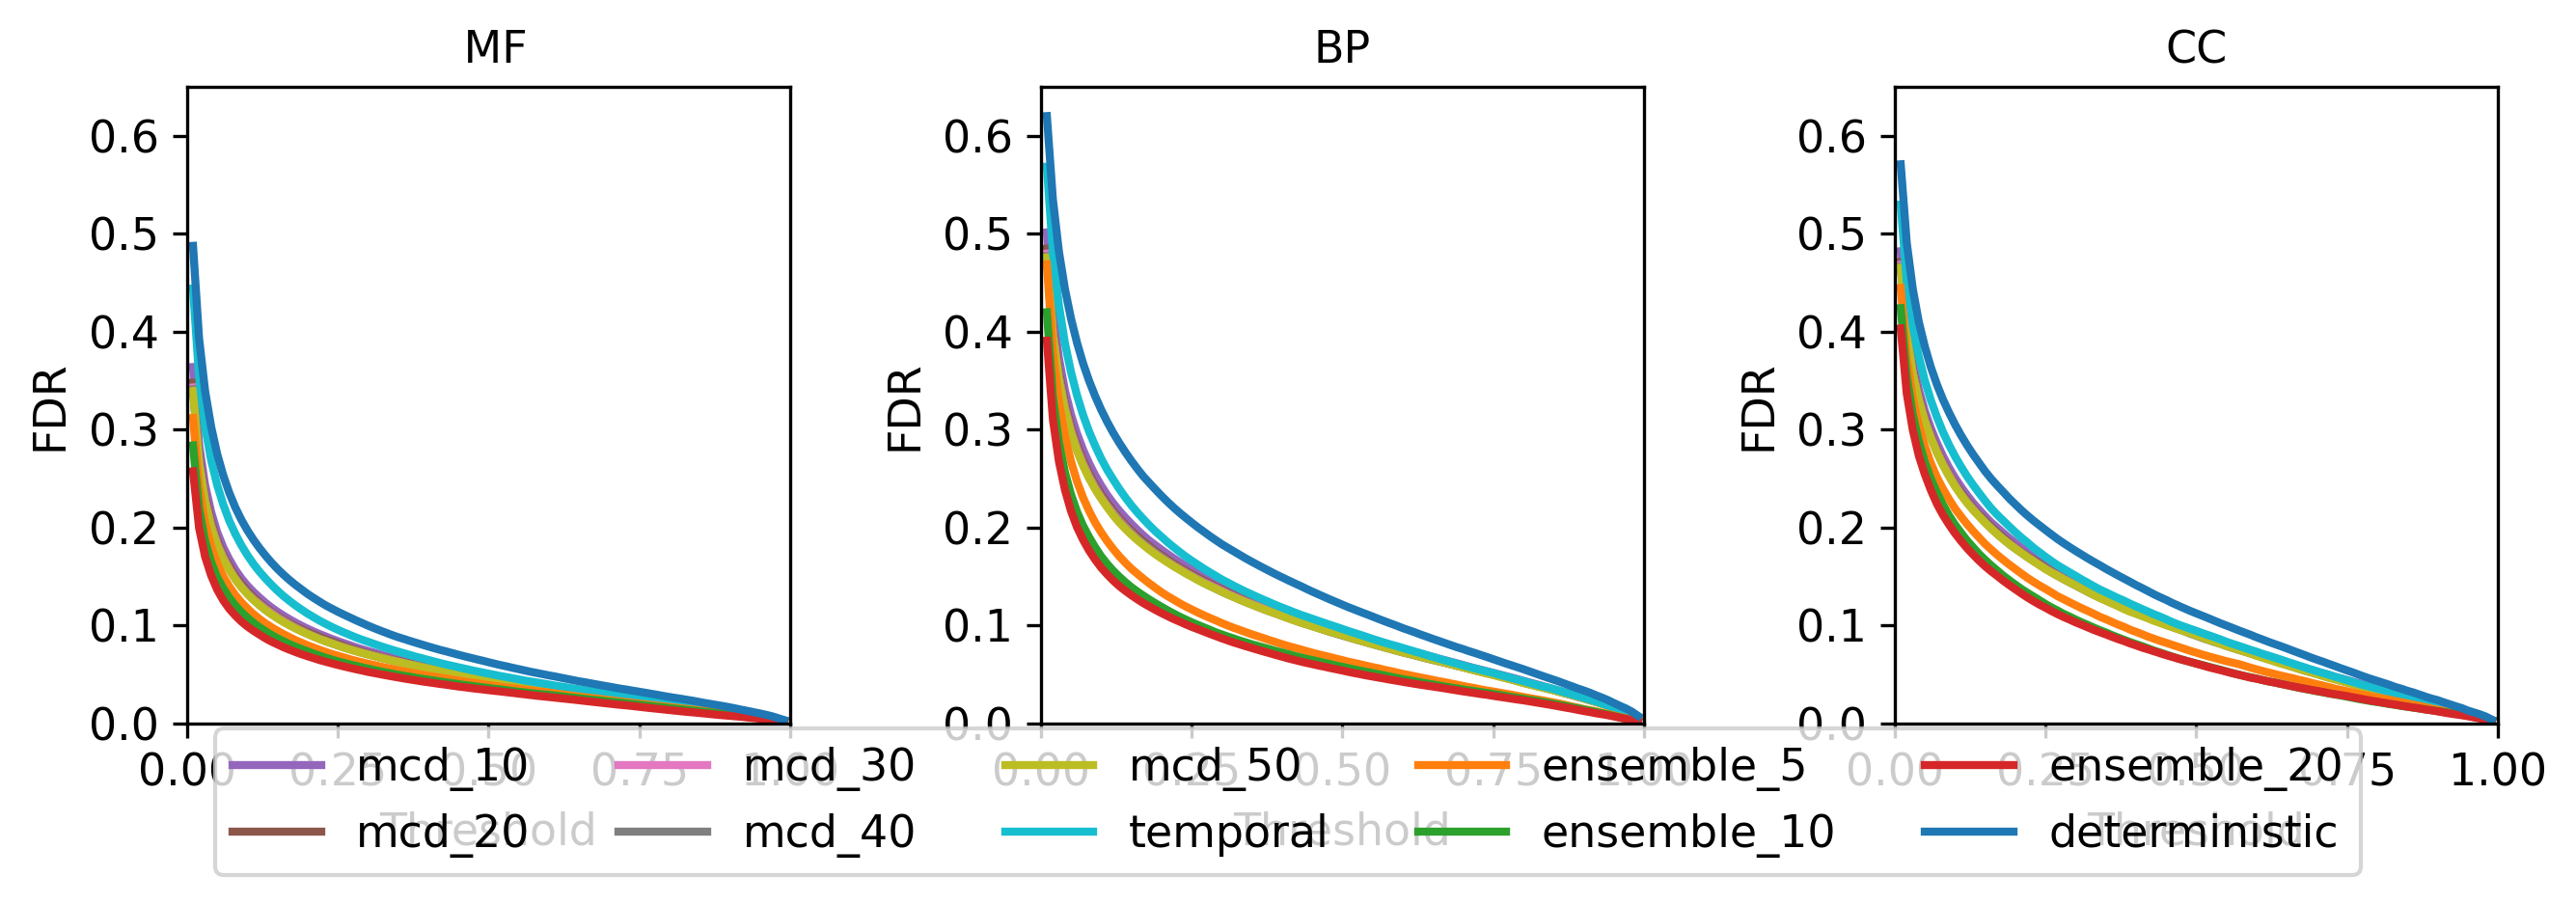

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

colors = {
    'deterministic': '#1f77b4',  # blue
    'ensemble_5': '#ff7f0e',     # orange
    'ensemble_10': '#2ca02c',    # green
    'ensemble_20': '#d62728',    # red
    'mcd_10': '#9467bd',         # purple
    'mcd_20': '#8c564b',         # brown
    'mcd_30': '#e377c2',         # pink
    'mcd_40': '#7f7f7f',         # gray
    'mcd_50': '#bcbd22',         # olive
    'temporal': '#17becf'        # cyan
}

fig, axes = plt.subplots(1, 3, figsize=(9, 3), dpi=300)

data_dict = {' MF': mf_data, 'BP': bp_data, 'CC': cc_data}
ontology_names = ['MF', 'BP', 'CC']

for idx, (ontology, data) in enumerate(data_dict.items()):
    ax = axes[idx]
    

    perf_data = data['performance_comparison']['methods']
    thresholds = perf_data['deterministic']['thresholds']
    

    for method_name, method_data in perf_data.items():
        if method_name in colors:
            ax.plot(thresholds, method_data['fdr'], 
                   color=colors[method_name], 
                   linewidth=2, 
                   label=method_name)
    

    ax.set_xlabel('Threshold', fontsize=11)
    ax.set_ylabel('FDR', fontsize=11)
    ax.set_title(f'{ontology}', fontsize=11)

    ax.tick_params(axis='both', which='major', labelsize=11)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 0.65)


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), 
          ncol=5, fontsize=11, frameon=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15) 
plt.show()

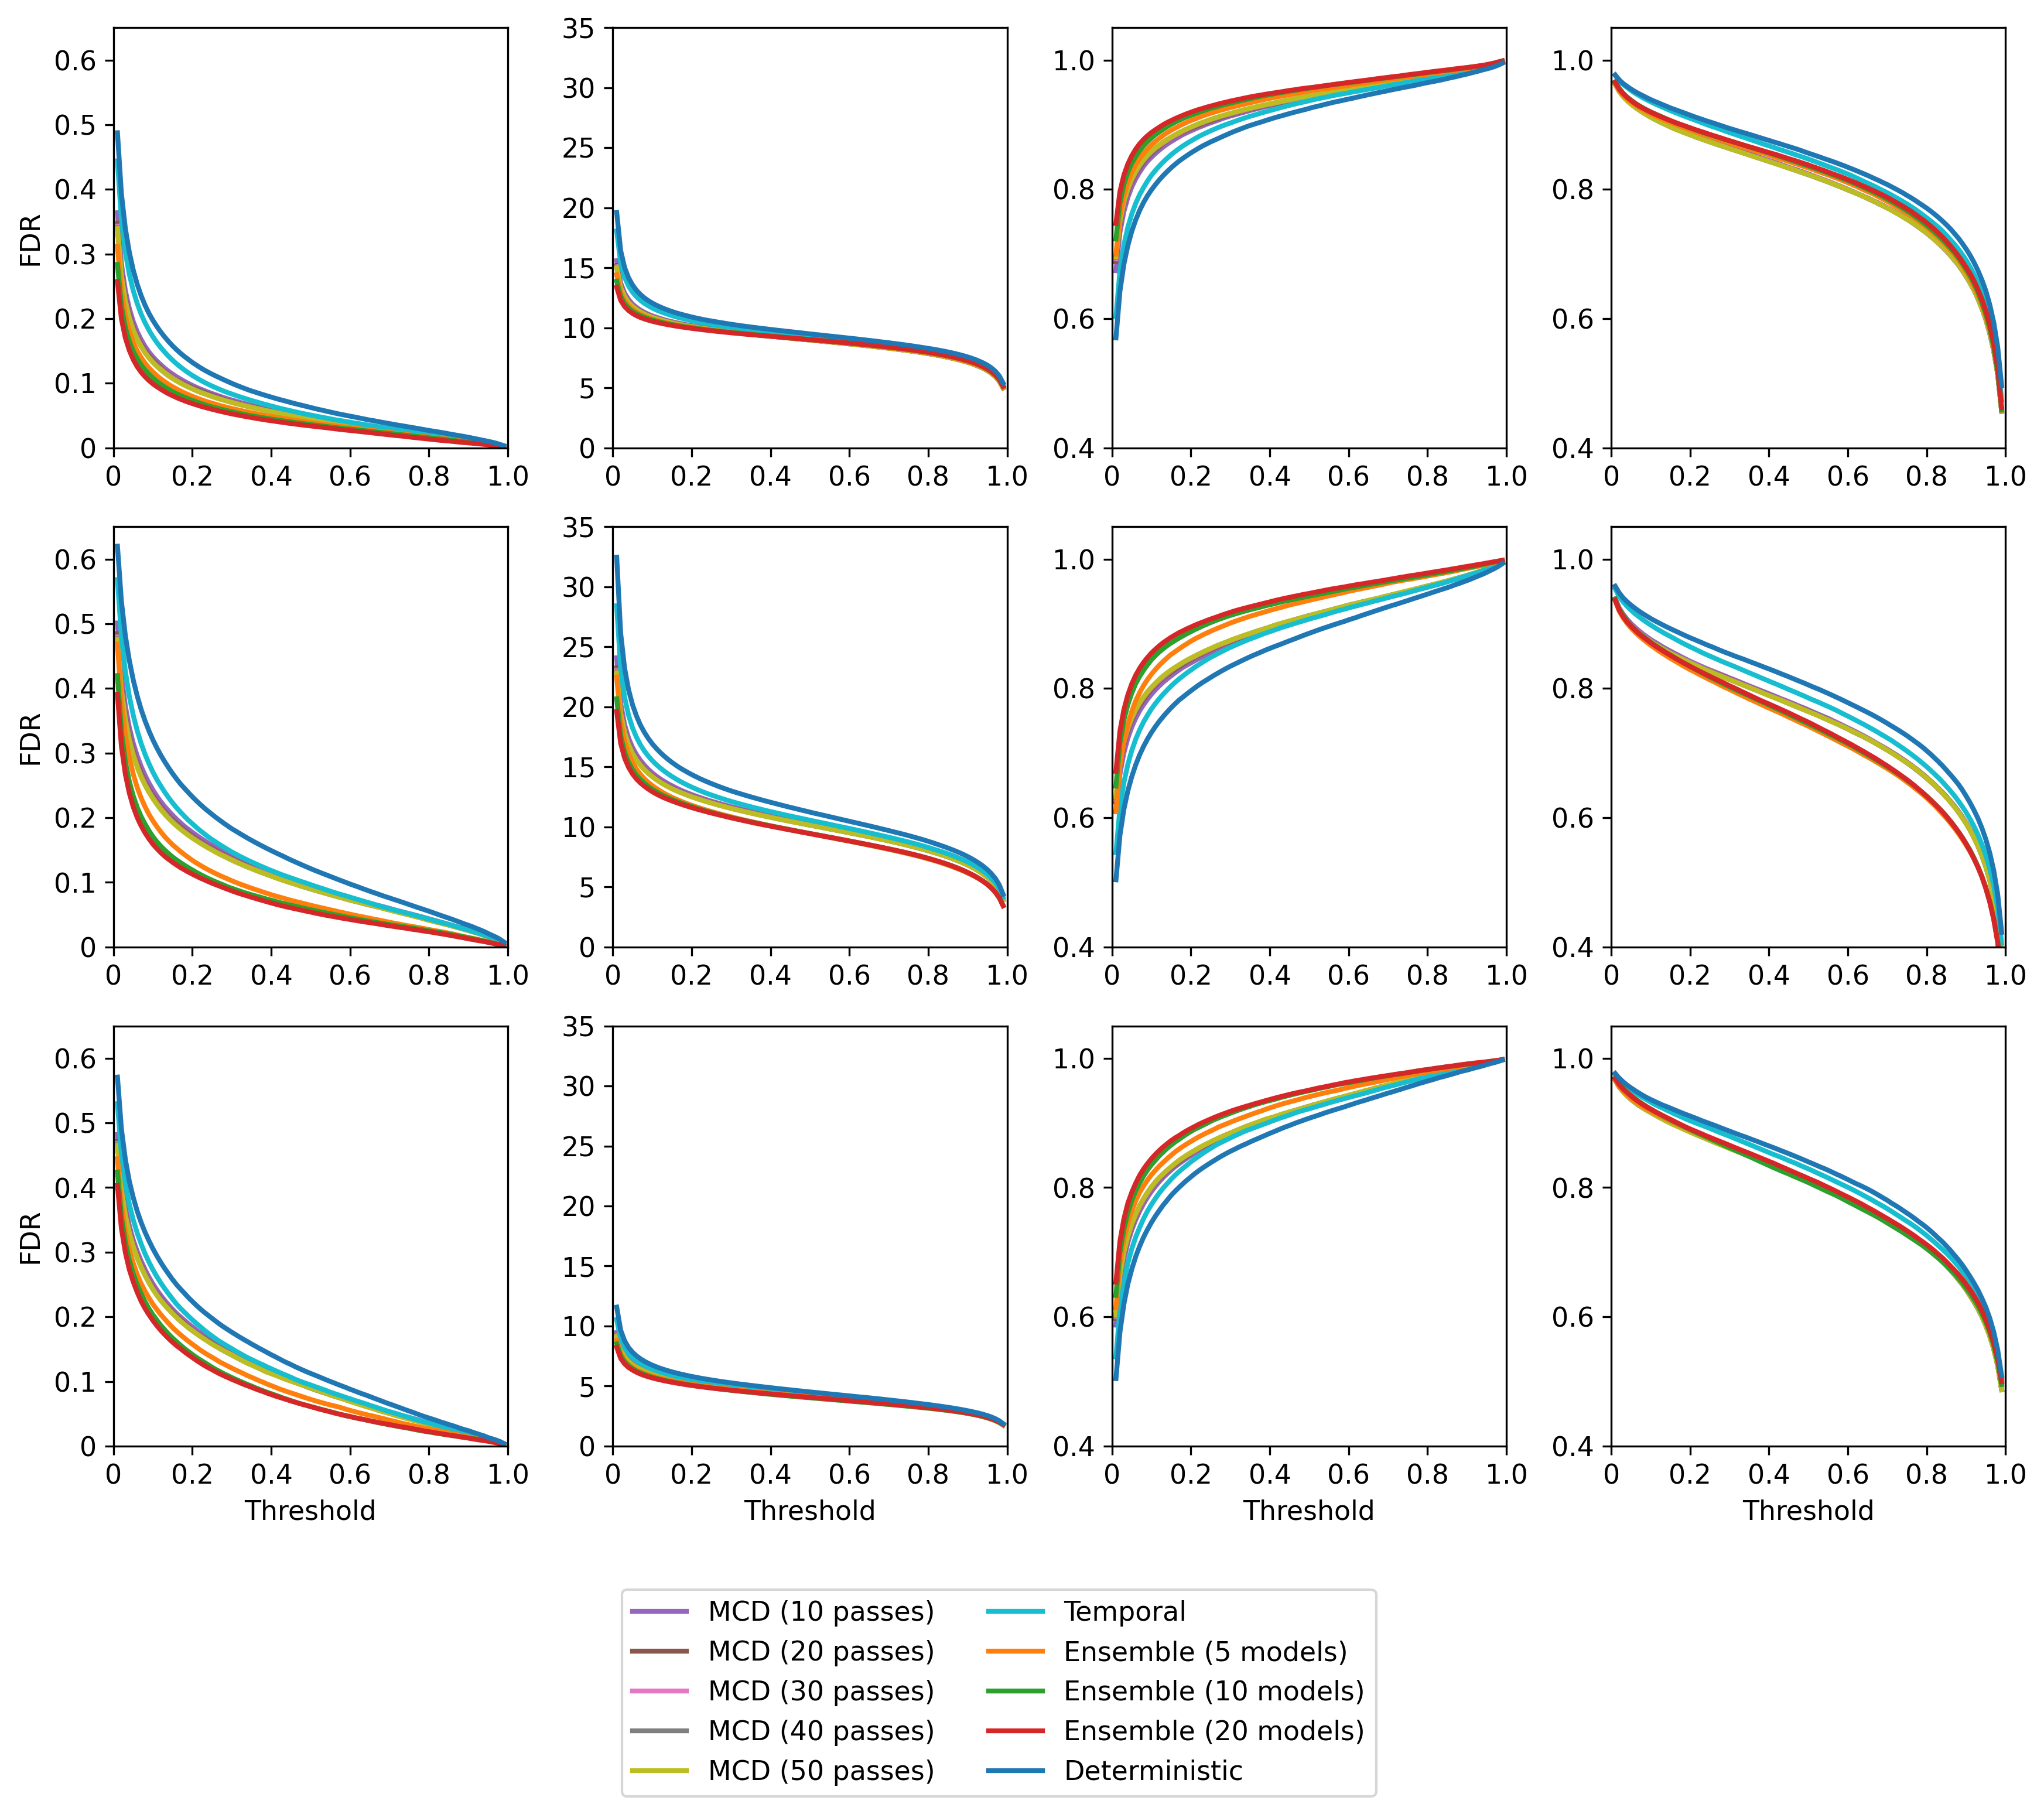

In [ ]:
method_labels = {
    'deterministic': 'Deterministic',
    'ensemble_5': 'Ensemble (5 models)',
    'ensemble_10': 'Ensemble (10 models)',
    'ensemble_20': 'Ensemble (20 models)',
    'mcd_10': 'MCD (10 passes)',
    'mcd_20': 'MCD (20 passes)',
    'mcd_30': 'MCD (30 passes)',
    'mcd_40': 'MCD (40 passes)',
    'mcd_50': 'MCD (50 passes)',
    'temporal': 'Temporal'
}

metrics = ['fdr', 'sharpness', 'precision_macro', 'recall_macro']
metric_labels = ['FDR', 'Sharpness', 'Precision (Macro)', 'Recall (Macro)']
metric_ylims = [(0, 0.65), (0, 35), (0.4, 1.05), (0.4, 1.05)]  # Fixed sharpness y-limit

fig, axes = plt.subplots(3, 4, figsize=(12, 9), dpi=300)

data_dict = {'MF': mf_data, 'BP': bp_data, 'CC': cc_data}
ontology_names = ['MF', 'BP', 'CC']

for ontology_idx, (ontology, data) in enumerate(data_dict.items()):
    for metric_idx, (metric, metric_label, ylim) in enumerate(zip(metrics, metric_labels, metric_ylims)):
        ax = axes[ontology_idx, metric_idx]
        
        perf_data = data['performance_comparison']['methods']
        thresholds = perf_data['deterministic']['thresholds']
        
        for method_name, method_data in perf_data.items():
            if method_name in colors:
                ax.plot(thresholds, method_data[metric], 
                       color=colors[method_name], 
                       linewidth=2, 
                       label=method_labels[method_name])
        
        if ontology_idx == len(data_dict) - 1:
            ax.set_xlabel('Threshold', fontsize=11)
        

        if metric_idx == 0:
            ax.set_ylabel(metric_label, fontsize=11)

        
        ax.tick_params(axis='both', which='major', labelsize=11)
        ax.set_xlim(0, 1)
        ax.set_ylim(ylim)
        
        ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        
        if metric == 'fdr':
            ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
            ax.set_yticklabels(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6'])
        elif metric == 'sharpness':
            ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35])
            ax.set_yticklabels(['0', '5', '10', '15', '20', '25', '30', '35'])
        else: 
            ax.set_yticks([0.4, 0.6, 0.8, 1.0])
            ax.set_yticklabels(['0.4', '0.6', '0.8', '1.0'])

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), 
          ncol=2, fontsize=11, frameon=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.08, left=0.08)
plt.show()

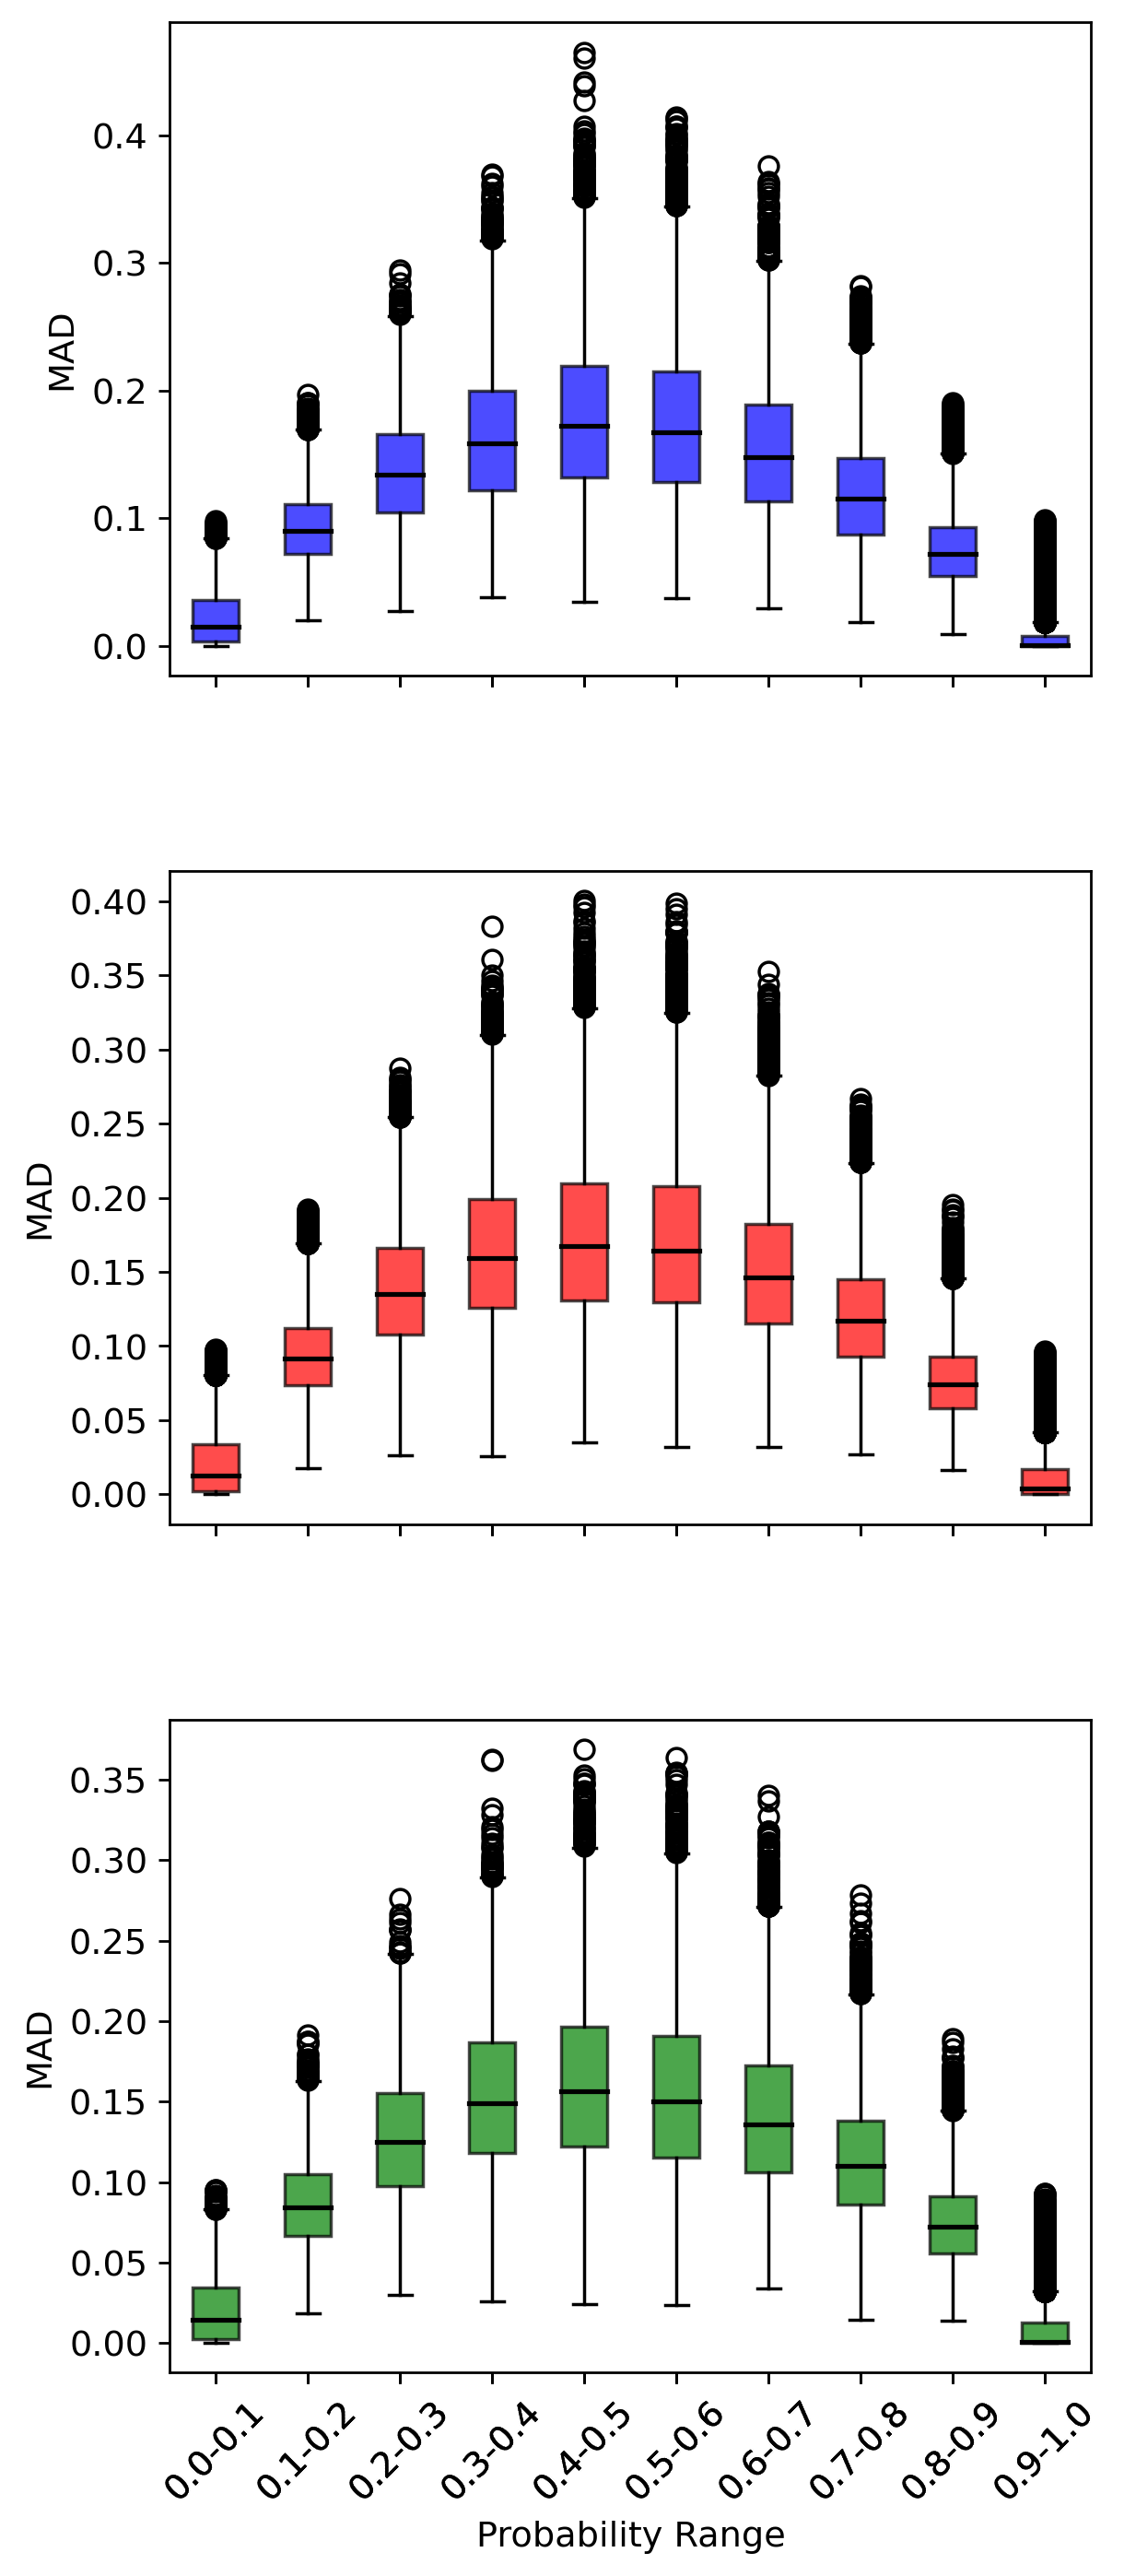

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(5, 12), dpi=250, sharex=True)

data_dict = {'MF': mf_data, 'BP': bp_data, 'CC': cc_data}
ontology_names = ['MF', 'BP', 'CC']
colors = ['blue','red', 'green']

for idx, (ontology, data) in enumerate(data_dict.items()):
    ax = axes[idx]
    
    boxplot_data = data['prob_range_boxplot']
    prob_range_data = boxplot_data['prob_range_data']
    prob_range_labels = boxplot_data['prob_range_labels']
    
    box_data = []
    valid_labels = []
    
    for i in range(len(prob_range_labels)):
        if str(i) in prob_range_data and len(prob_range_data[str(i)]) > 0:
            box_data.append(prob_range_data[str(i)])
            valid_labels.append(prob_range_labels[i])
    
    if box_data:
        bp = ax.boxplot(box_data, labels=valid_labels, patch_artist=True, 
                       boxprops=dict(facecolor=colors[idx], alpha=0.7))
        
        for box in bp['boxes']:
            box.set_facecolor(colors[idx])
            box.set_alpha(0.7)
            box.set_edgecolor('black')
        
        for median in bp['medians']:
            median.set_color('black')
            median.set_linewidth(1.5)
    
    ax.set_ylabel('MAD', fontsize=11)
    ax.tick_params(axis='both', which='major', labelsize=11)
    ax.tick_params(axis='x', rotation=45)
    
    if idx == len(data_dict) - 1:
        ax.set_xlabel('Probability Range', fontsize=11)

plt.subplots_adjust(
    top=0.95,      
    bottom=0.1,    
    left=0.15,     
    right=0.95,    
    hspace=0.3     
)

plt.show()

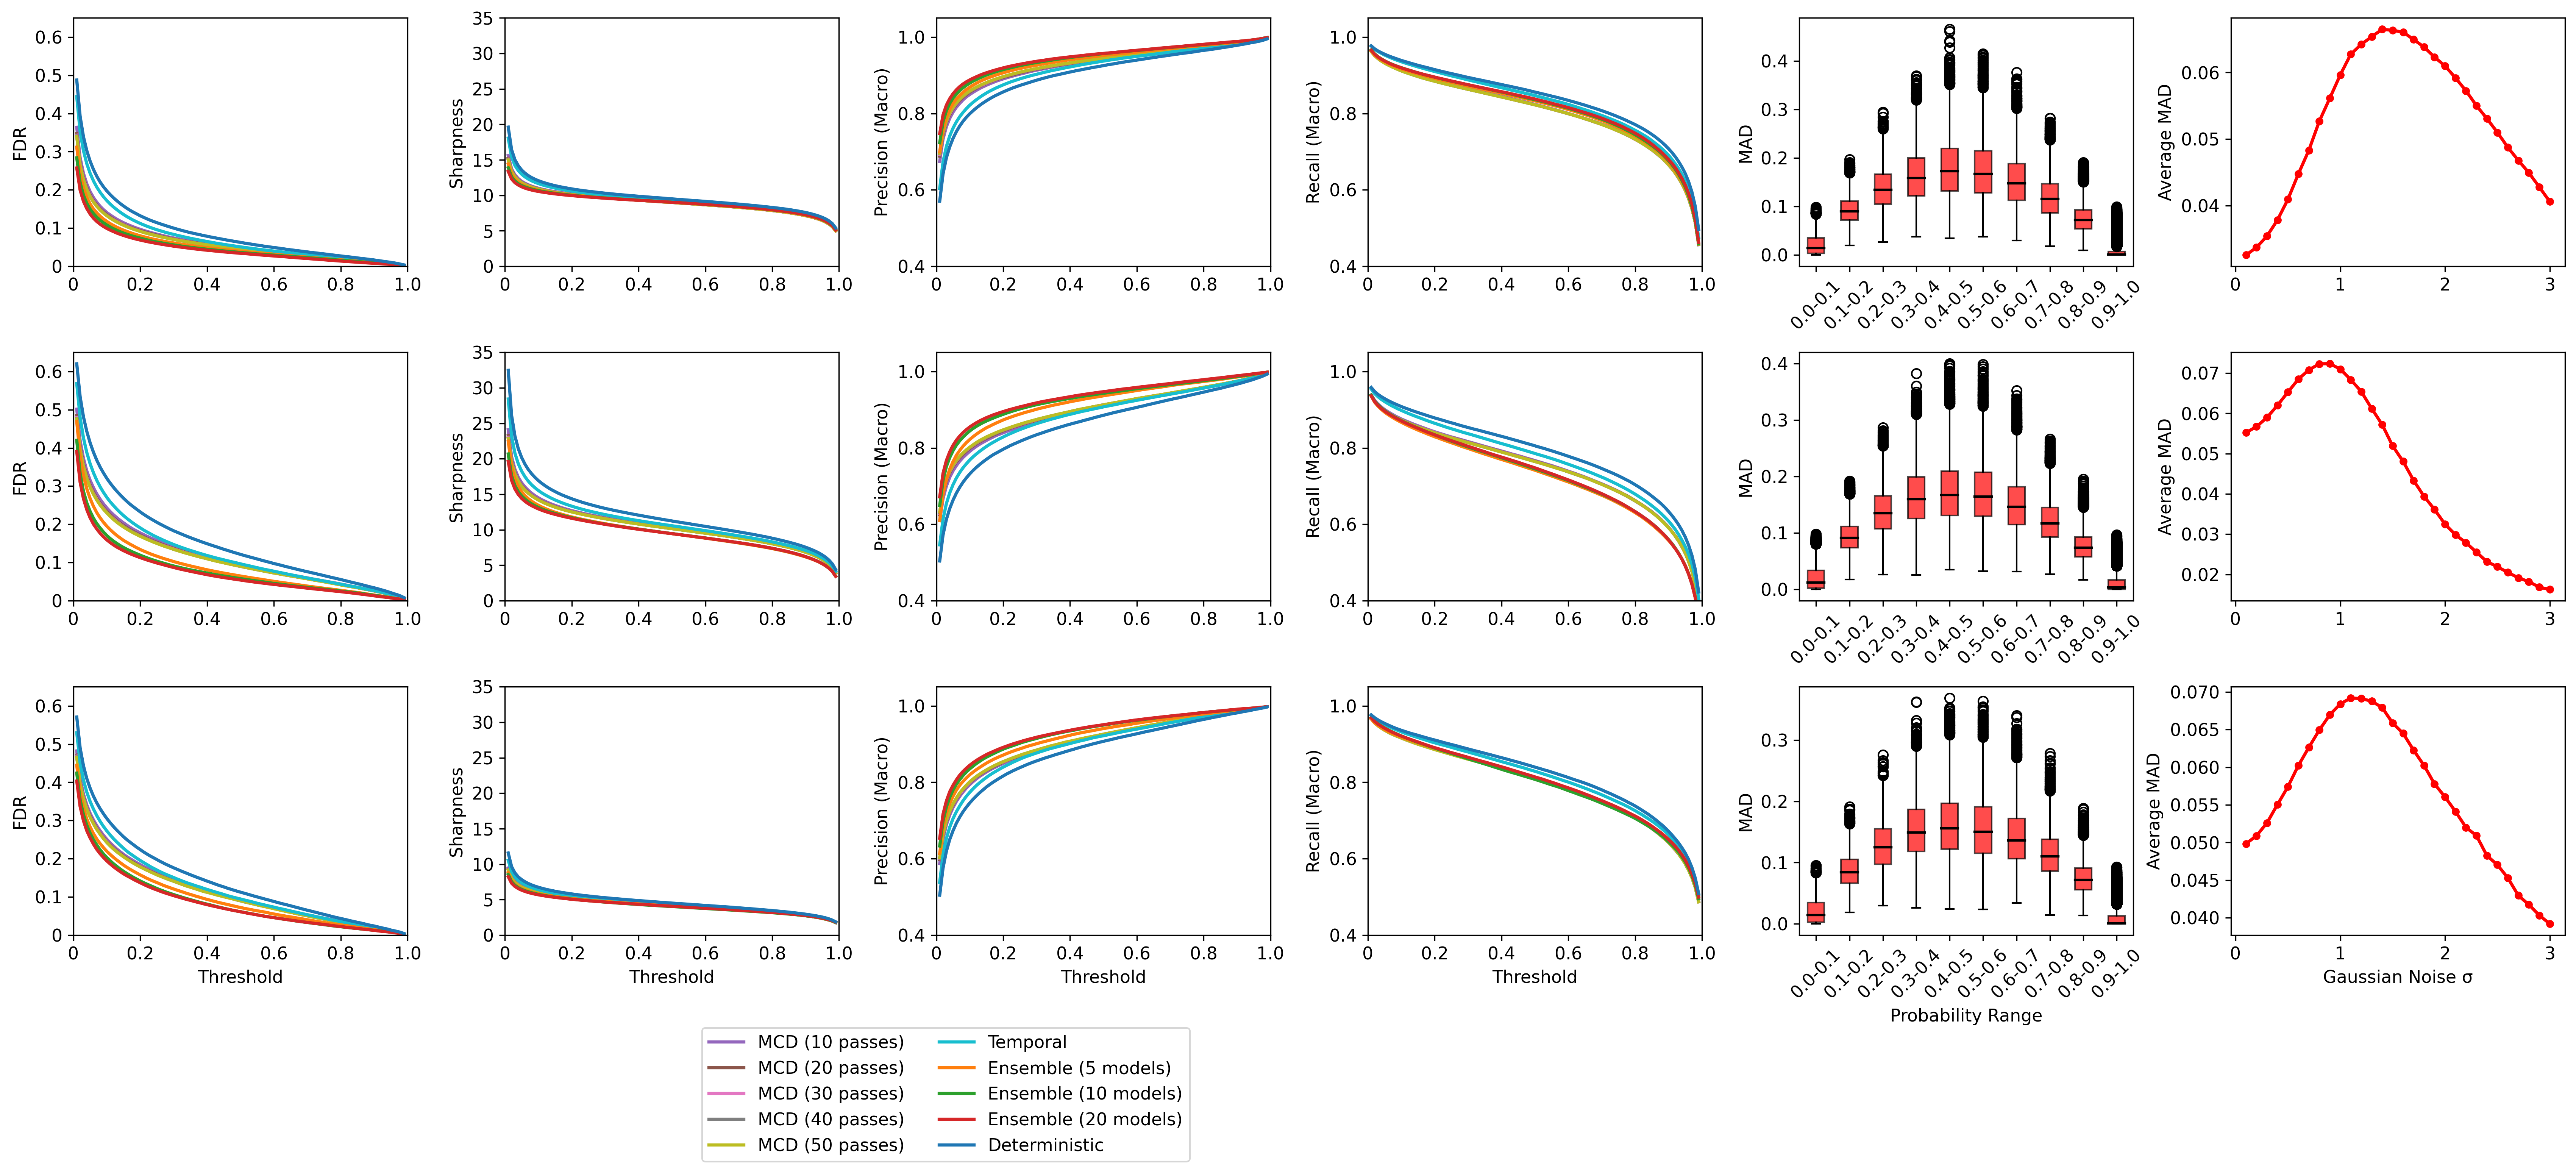

In [ ]:
metrics = ['fdr', 'sharpness', 'precision_macro', 'recall_macro']
metric_labels = ['FDR', 'Sharpness', 'Precision (Macro)', 'Recall (Macro)']
metric_ylims = [(0, 0.65), (0, 35), (0.4, 1.05), (0.4, 1.05)]

fig, axes = plt.subplots(3, 6, figsize=(24, 9), dpi=300)

data_dict = {'MF': mf_data, 'BP': bp_data, 'CC': cc_data}
ontology_names = ['MF', 'BP', 'CC']
boxplot_colors = ['red', 'red', 'red']

for ontology_idx, (ontology, data) in enumerate(data_dict.items()):

    for metric_idx, (metric, metric_label, ylim) in enumerate(zip(metrics, metric_labels, metric_ylims)):
        ax = axes[ontology_idx, metric_idx]
        

        perf_data = data['performance_comparison']['methods']
        thresholds = perf_data['deterministic']['thresholds']
        

        for method_name, method_data in perf_data.items():
            if method_name in colors:
                ax.plot(thresholds, method_data[metric], 
                       color=colors[method_name], 
                       linewidth=2, 
                       label=method_labels[method_name])
        
        if ontology_idx == len(data_dict) - 1:
            ax.set_xlabel('Threshold', fontsize=11)
        
        ax.set_ylabel(metric_label, fontsize=11)
        
        ax.tick_params(axis='both', which='major', labelsize=11)
        ax.set_xlim(0, 1)
        ax.set_ylim(ylim)
        

        ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        

        if metric == 'fdr':
            ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
            ax.set_yticklabels(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6'])
        elif metric == 'sharpness':
            ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35])
            ax.set_yticklabels(['0', '5', '10', '15', '20', '25', '30', '35'])
        else: 
            ax.set_yticks([0.4, 0.6, 0.8, 1.0])
            ax.set_yticklabels(['0.4', '0.6', '0.8', '1.0'])
    
    
    ax = axes[ontology_idx, 4]
    
    
    boxplot_data = data['prob_range_boxplot']
    prob_range_data = boxplot_data['prob_range_data']
    prob_range_labels = boxplot_data['prob_range_labels']
    
    
    box_data = []
    valid_labels = []
    
    for i in range(len(prob_range_labels)):
        if str(i) in prob_range_data and len(prob_range_data[str(i)]) > 0:
            box_data.append(prob_range_data[str(i)])
            valid_labels.append(prob_range_labels[i])
    
    
    if box_data:
        bp = ax.boxplot(box_data, labels=valid_labels, patch_artist=True, 
                       boxprops=dict(facecolor=boxplot_colors[ontology_idx], alpha=0.7))
        
    
        for box in bp['boxes']:
            box.set_facecolor(boxplot_colors[ontology_idx])
            box.set_alpha(0.7)
            box.set_edgecolor('black')
        
        for median in bp['medians']:
            median.set_color('black')
            median.set_linewidth(1.5)
    
    
    ax.set_ylabel('MAD', fontsize=11)
    ax.tick_params(axis='both', which='major', labelsize=11)
    ax.tick_params(axis='x', rotation=45)
    
    
    if ontology_idx == len(data_dict) - 1:
        ax.set_xlabel('Probability Range', fontsize=11)
    
    
    ax = axes[ontology_idx, 5]
    
    
    robustness_data = data['robustness']
    noise_levels = robustness_data['noise_levels']
    avg_mads = robustness_data['avg_mads']
    
    
    ax.plot(noise_levels, avg_mads, marker='o', linewidth=2, markersize=4, color = 'red')
    
    
    ax.set_ylabel('Average MAD', fontsize=11)
    ax.tick_params(axis='both', which='major', labelsize=11)
    
    
    
    if ontology_idx == len(data_dict) - 1:
        ax.set_xlabel('Gaussian Noise σ', fontsize=11)


handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.4, -0.15), 
          ncol=2, fontsize=11, frameon=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.08, left=0.08)
plt.show()

/var/folders/ky/jqpqz88565l8qdqz4jf3387c0000gn/T/ipykernel_7630/2057010227.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


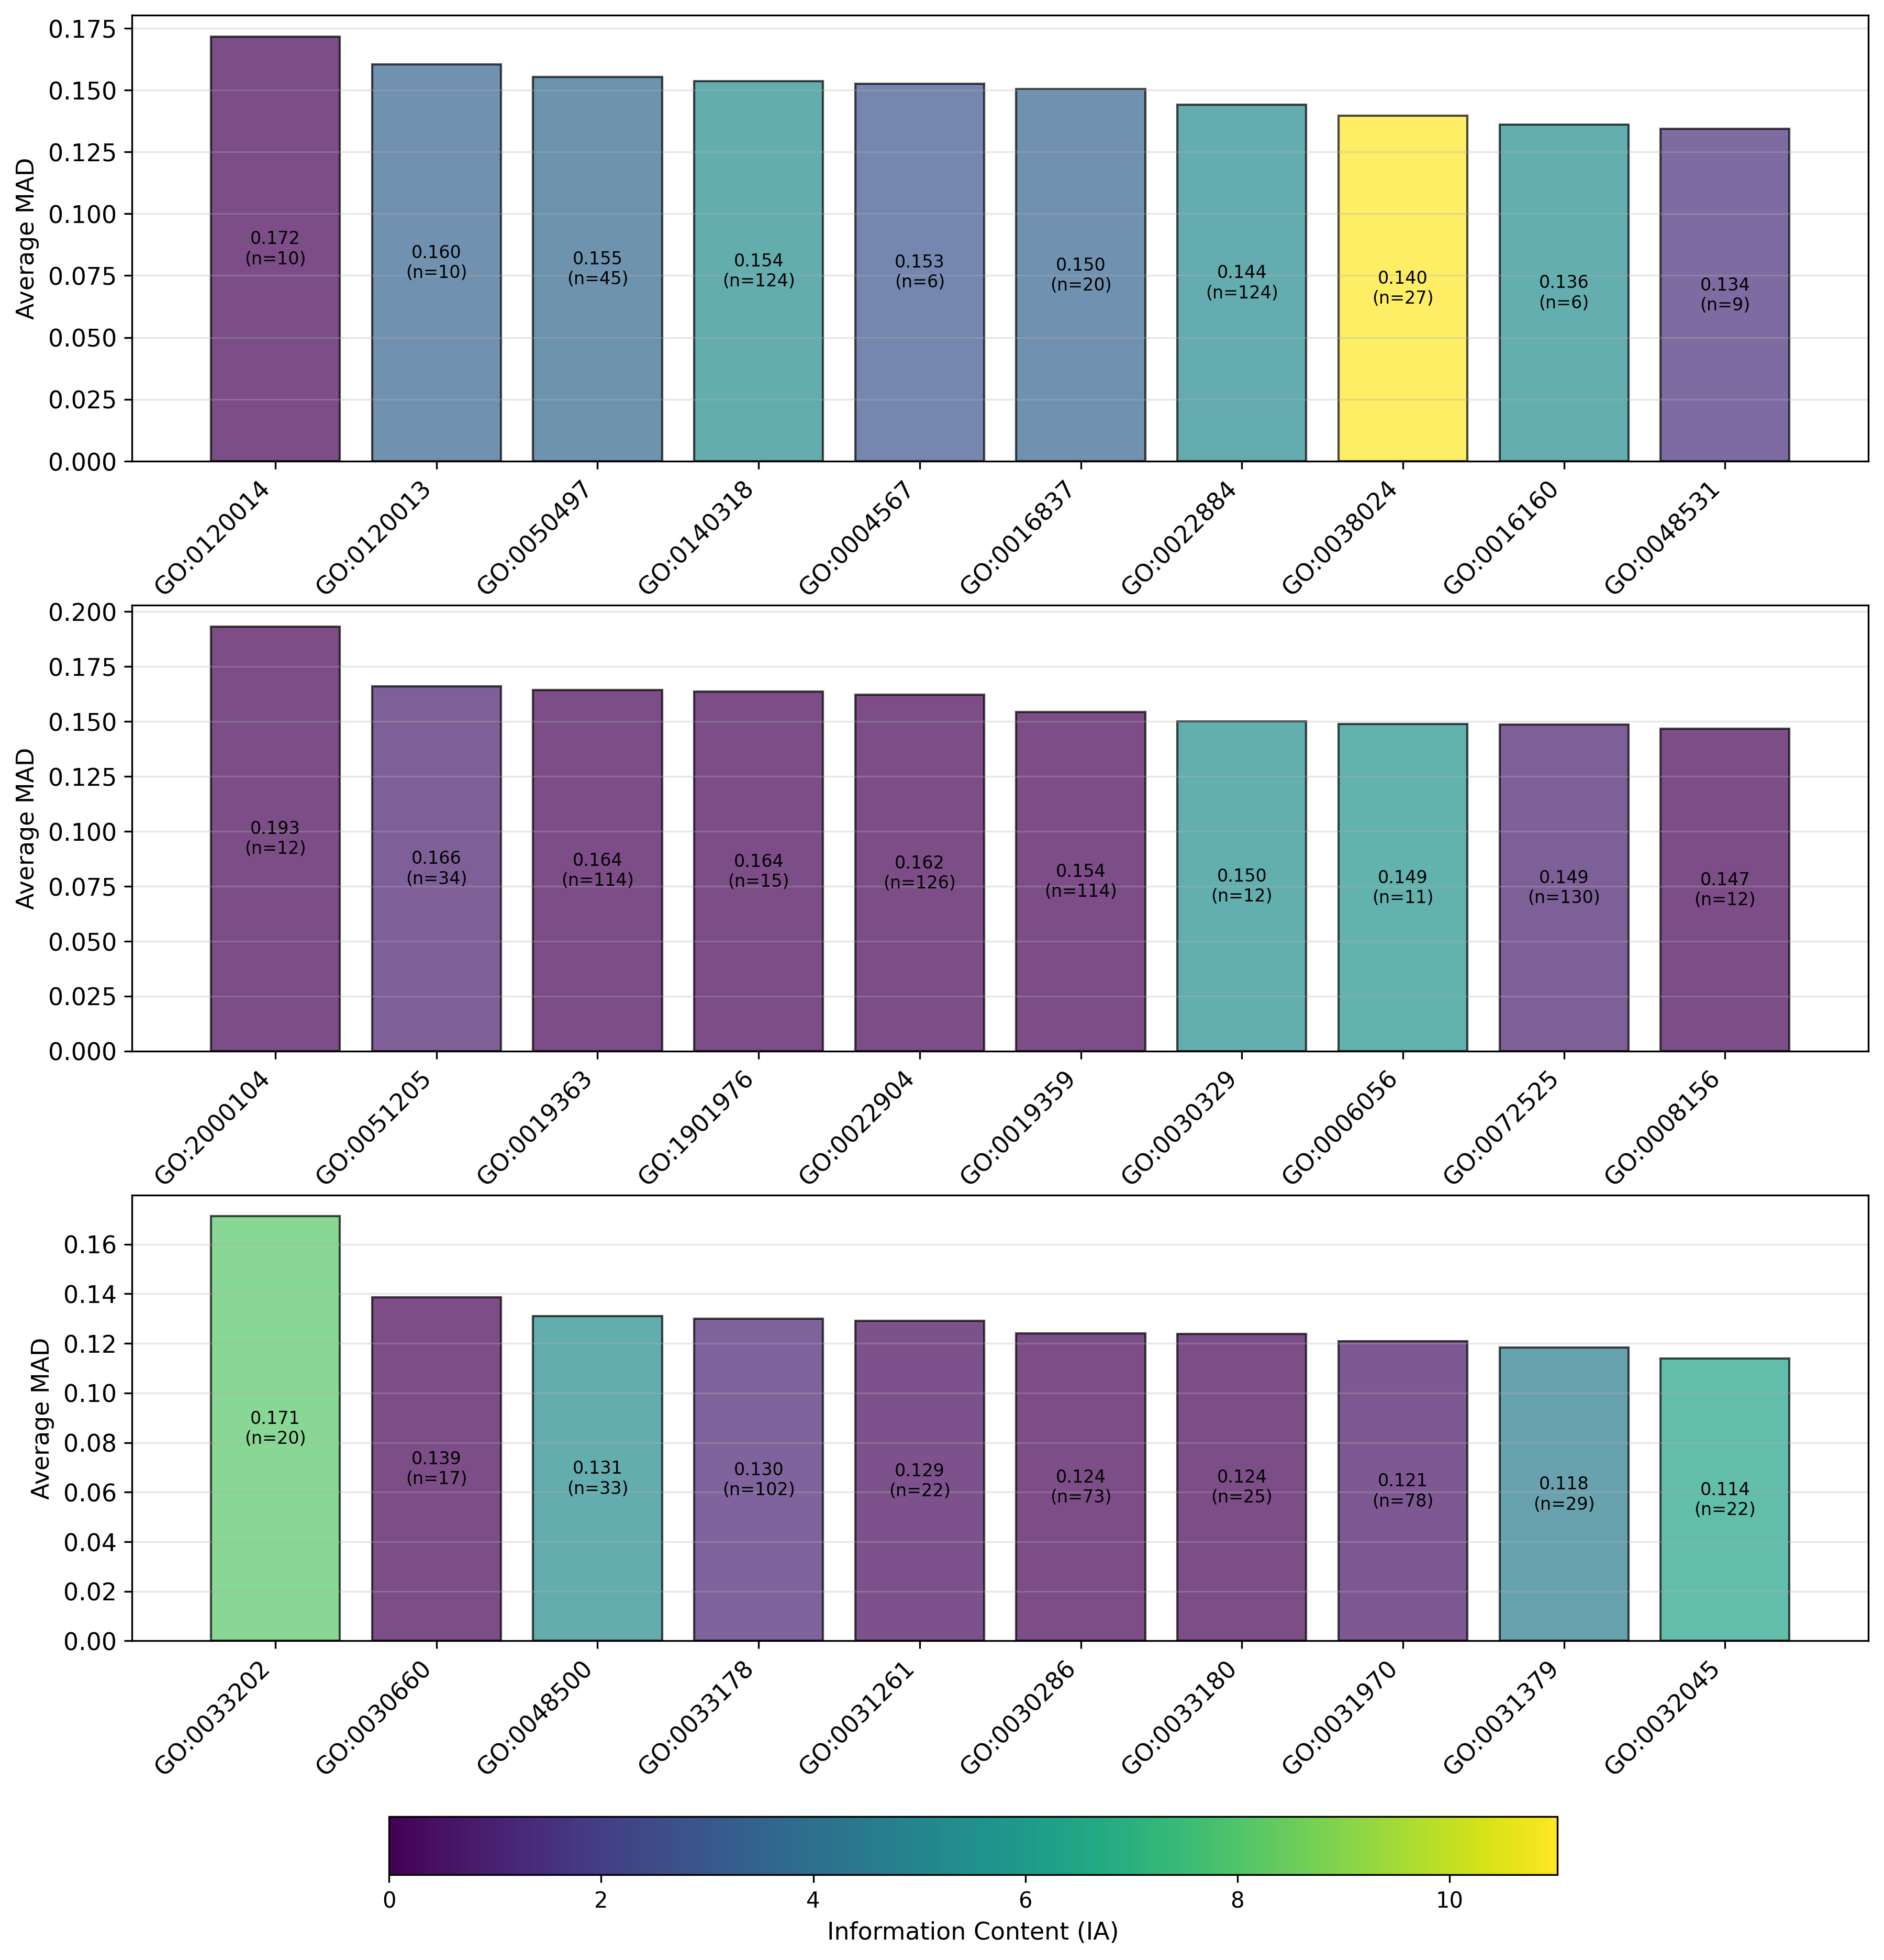

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd


ia_df = pd.read_csv('IA_all.tsv', sep='\t', header=None, names=['GO_term', 'IA'])

fig, axes = plt.subplots(3, 1, figsize=(12, 15), dpi=300)
data_dict = {'MF': mf_data, 'BP': bp_data, 'CC': cc_data}
ontology_names = ['MF', 'BP', 'CC']
all_ia_values = []

for ontology, data in data_dict.items():
    term_data = data['term_analysis']
    top_uncertain_terms = term_data['top_uncertain_terms']
    go_terms = top_uncertain_terms['go_terms']
    
    for term in go_terms:
        # Find IA value for this term
        ia_value = ia_df[ia_df['GO_term'] == term]['IA'].values
        if len(ia_value) > 0:
            all_ia_values.append(ia_value[0])


min_ia = min(all_ia_values)
max_ia = max(all_ia_values)


for idx, (ontology, data) in enumerate(data_dict.items()):
    ax = axes[idx]

    term_data = data['term_analysis']
    top_uncertain_terms = term_data['top_uncertain_terms']
    
    go_terms = top_uncertain_terms['go_terms']
    avg_mad = top_uncertain_terms['avg_mad']
    counts = top_uncertain_terms['counts']
    
    ia_values = []
    for term in go_terms:
        ia_value = ia_df[ia_df['GO_term'] == term]['IA'].values
        if len(ia_value) > 0:
            ia_values.append(ia_value[0])
        else:
            ia_values.append(0)  # Default if term not found
    

    if len(go_terms) > 0:

        normalized_ia = [(ia - min_ia) / (max_ia - min_ia) for ia in ia_values]
        
        bars = ax.bar(range(len(go_terms)), avg_mad, 
                     color=plt.cm.viridis(normalized_ia), 
                     alpha=0.7, edgecolor='black')
        
        ax.set_xticks(range(len(go_terms)))
        ax.set_xticklabels(go_terms, rotation=45, ha='right', fontsize=10)
        ax.set_ylabel('Average MAD', fontsize=11)
        # ax.set_title(f'Top 10 Most Uncertain GO Terms - {ontology}', fontsize=11)
        ax.grid(True, alpha=0.3, axis='y')

        for i, (bar, count, ia) in enumerate(zip(bars, counts, ia_values)):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height/2,  
                f'{height:.3f}\n(n={count})', ha='center', va='center', fontsize=8)
    
    
    ax.tick_params(axis='both', which='major', labelsize=11)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(min_ia, max_ia))
cbar = plt.colorbar(sm, ax=axes, orientation='horizontal', pad=0.2, shrink=0.8)
cbar.set_label('Information Content (IA)', fontsize=11)

plt.tight_layout()
plt.subplots_adjust(bottom=0.3) 
plt.show()